# PAN Card

In [2]:
import pytesseract
import cv2
from matplotlib import pyplot as plt
import re

pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

### OCR apply method
- Input Image -> Convert to Grayscale -> Gaussian Blur -> Otsu's Threshold
- Notice how there are tiny specs of noise, to remove them we can perform morphological operations.
- Finally we invert the image.

Page segmentation modes:
e.g: `config="--psm 4"`
```
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR.
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.
 ```

are eran Get Hrs
Permanent Account Number Card § =

EHKPP9969J ©

» 4Tq/ Name
BHAGABAT! PRASAD PANDA

fal St ATG / Father's Name
MANORANJAN PANDA

| , 4, Se
10/03/1998. ;% by m : wravrore | Ginnatiirea


TEXT:  are eran Get Hrs new_line Permanent Account Number Card § = new_line  new_line EHKPP9969J © new_line  new_line » 4Tq/ Name new_line BHAGABAT! PRASAD PANDA new_line  new_line fal St ATG / Father's Name new_line MANORANJAN PANDA new_line  new_line | , 4, Se new_line 10/03/1998. ;% by m : wravrore | Ginnatiirea new_line  new_line 


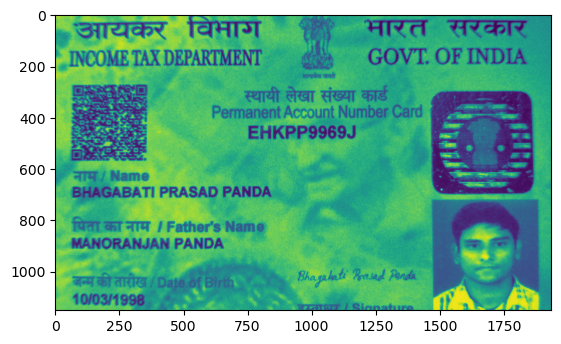

In [3]:
image = cv2.imread("../assets/pan/7.jpg")
# Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Gaussian blur
blur = cv2.GaussianBlur(gray, (3, 3), 0)
# Otsu's threshold
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Morph open to remove noise and invert image
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
invert = 255 - opening

# Perform text extraction
current_processing_image = gray
# data = pytesseract.image_to_string(invert, lang="eng", config="--psm 6")
data = pytesseract.image_to_string(
    current_processing_image, lang="eng", config="--psm 4"
)
print(data)

text = data.replace("\n", " new_line ")
print("TEXT: ", text)

# Show image
plt.imshow(current_processing_image)

In [4]:
def extract_data(text):
    # init variables
    splitted_text = []
    pan_no_index = None
    pan_no = None
    name = None
    dob = None

    for txt in text.split("new_line"):
        txt = txt.strip()
        if txt:
            splitted_text.append(txt)
    print(text)
    print("splitted text: ", splitted_text) 
    print("\n-----------\n")

    # Date of Birth
    dob_match = re.search('[0-9]{2}/[0-9]{2}/[0-9]{2,4}', text)
    if dob_match:
        dob = dob_match.group(0)

    for str in splitted_text:
        # PAN Number
        pan_no_match = re.search('[A-Za-z]{5}[0-9]{4}[A-Za-z]{1}', text)
        if pan_no_match:
            pan_no = pan_no_match.group(0)
            if pan_no in str:
                pan_no_index = splitted_text.index(str)

        curr_indx = splitted_text.index(str)
        if pan_no and pan_no_index is not None and curr_indx > pan_no_index:
            # Name
            if 'name' in str.lower():
                name_index = splitted_text.index(str)
                guessed_name = splitted_text[name_index + 1]
                extract_only_upper_match = re.search("[A-Z ]+", guessed_name)

                if extract_only_upper_match and name is None:
                    name = extract_only_upper_match.group(0)
            elif str.isupper() and name is None:
                name = str

    response = {
        'panNumber': pan_no,
        'name': name,
        'dob': dob
    }
    print('Response: ',response)

    return response

extract_data(text)

are eran Get Hrs new_line Permanent Account Number Card § = new_line  new_line EHKPP9969J © new_line  new_line » 4Tq/ Name new_line BHAGABAT! PRASAD PANDA new_line  new_line fal St ATG / Father's Name new_line MANORANJAN PANDA new_line  new_line | , 4, Se new_line 10/03/1998. ;% by m : wravrore | Ginnatiirea new_line  new_line 
splitted text:  ['are eran Get Hrs', 'Permanent Account Number Card § =', 'EHKPP9969J ©', '» 4Tq/ Name', 'BHAGABAT! PRASAD PANDA', "fal St ATG / Father's Name", 'MANORANJAN PANDA', '| , 4, Se', '10/03/1998. ;% by m : wravrore | Ginnatiirea']

-----------

Response:  {'panNumber': 'EHKPP9969J', 'name': 'BHAGABAT', 'dob': '10/03/1998'}


{'panNumber': 'EHKPP9969J', 'name': 'BHAGABAT', 'dob': '10/03/1998'}